In [1]:
import numpy as np
import pandas as pd 
import sklearn.datasets
import sklearn.linear_model
import sklearn.metrics
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)  # do not change for reproducibility

In this test we use the [Covertype Data Set](http://archive.ics.uci.edu/ml/datasets/Covertype), a dataset describing cartographic 
features of areas of land in the USA and also its forest type according to the US Forest Service. 
There are seven classes (1-7), 581012 samples and 54 features.
For this test, we're only interested in cover type 3.




In [3]:
dataset = sklearn.datasets.fetch_covtype()

In [4]:
# only use a random subset for speed - pretend the rest of the data doesn't exist
random_sample = np.random.choice(len(dataset.data), len(dataset.data) // 10)

COVER_TYPE = 3
features = dataset.data[random_sample, :]
target = dataset.target[random_sample] == COVER_TYPE

A junior colleague tells you that they're getting 96% accuracy using logistic regression. You review their work and see the following:

In [5]:
classifier = sklearn.linear_model.LogisticRegression(solver='liblinear') # do not change this


In [6]:
classifier.fit(features,  target)
training_predictions = classifier.predict(features)
accuracy = sklearn.metrics.accuracy_score(training_predictions, target)

In [7]:
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.961


**Question 1**

Comment on what was done above. Evaluate the accuracy more thoroughly. Do not modify the parameters of the model (the cell marked with the comment). Use the classifier object.

In [8]:
### Write your code and explanation here. INCLUDE ALL ANALYSIS ETC. YOU USE

In [9]:
df = pd.DataFrame(np.concatenate((features,np.expand_dims(target, axis=1)),axis=1))

In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,...,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000
mean,2959.401749,155.058209,14.117760,268.418220,46.075747,2358.679816,212.245762,223.303024,142.382369,1990.753034,...,0.091461,0.077933,0.002513,0.002995,0.000241,0.000602,0.026919,0.024389,0.014423,0.060946
std,280.890598,111.712352,7.478336,210.691254,57.934855,1557.925053,26.731222,19.768394,38.245774,1336.478852,...,0.288267,0.268069,0.050066,0.054643,0.015521,0.024537,0.161847,0.154254,0.119228,0.239233
min,1861.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,52.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2811.000000,58.000000,9.000000,108.000000,7.000000,1114.000000,198.000000,213.000000,119.000000,1026.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,2012.000000,218.000000,226.000000,143.000000,1712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3165.000000,259.000000,18.000000,384.000000,68.000000,3330.000000,231.000000,237.000000,168.000000,2563.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3850.000000,360.000000,65.000000,1338.000000,581.000000,7117.000000,254.000000,254.000000,254.000000,7150.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

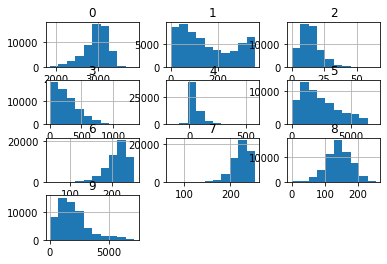

In [11]:
df.iloc[:,0:10].hist()

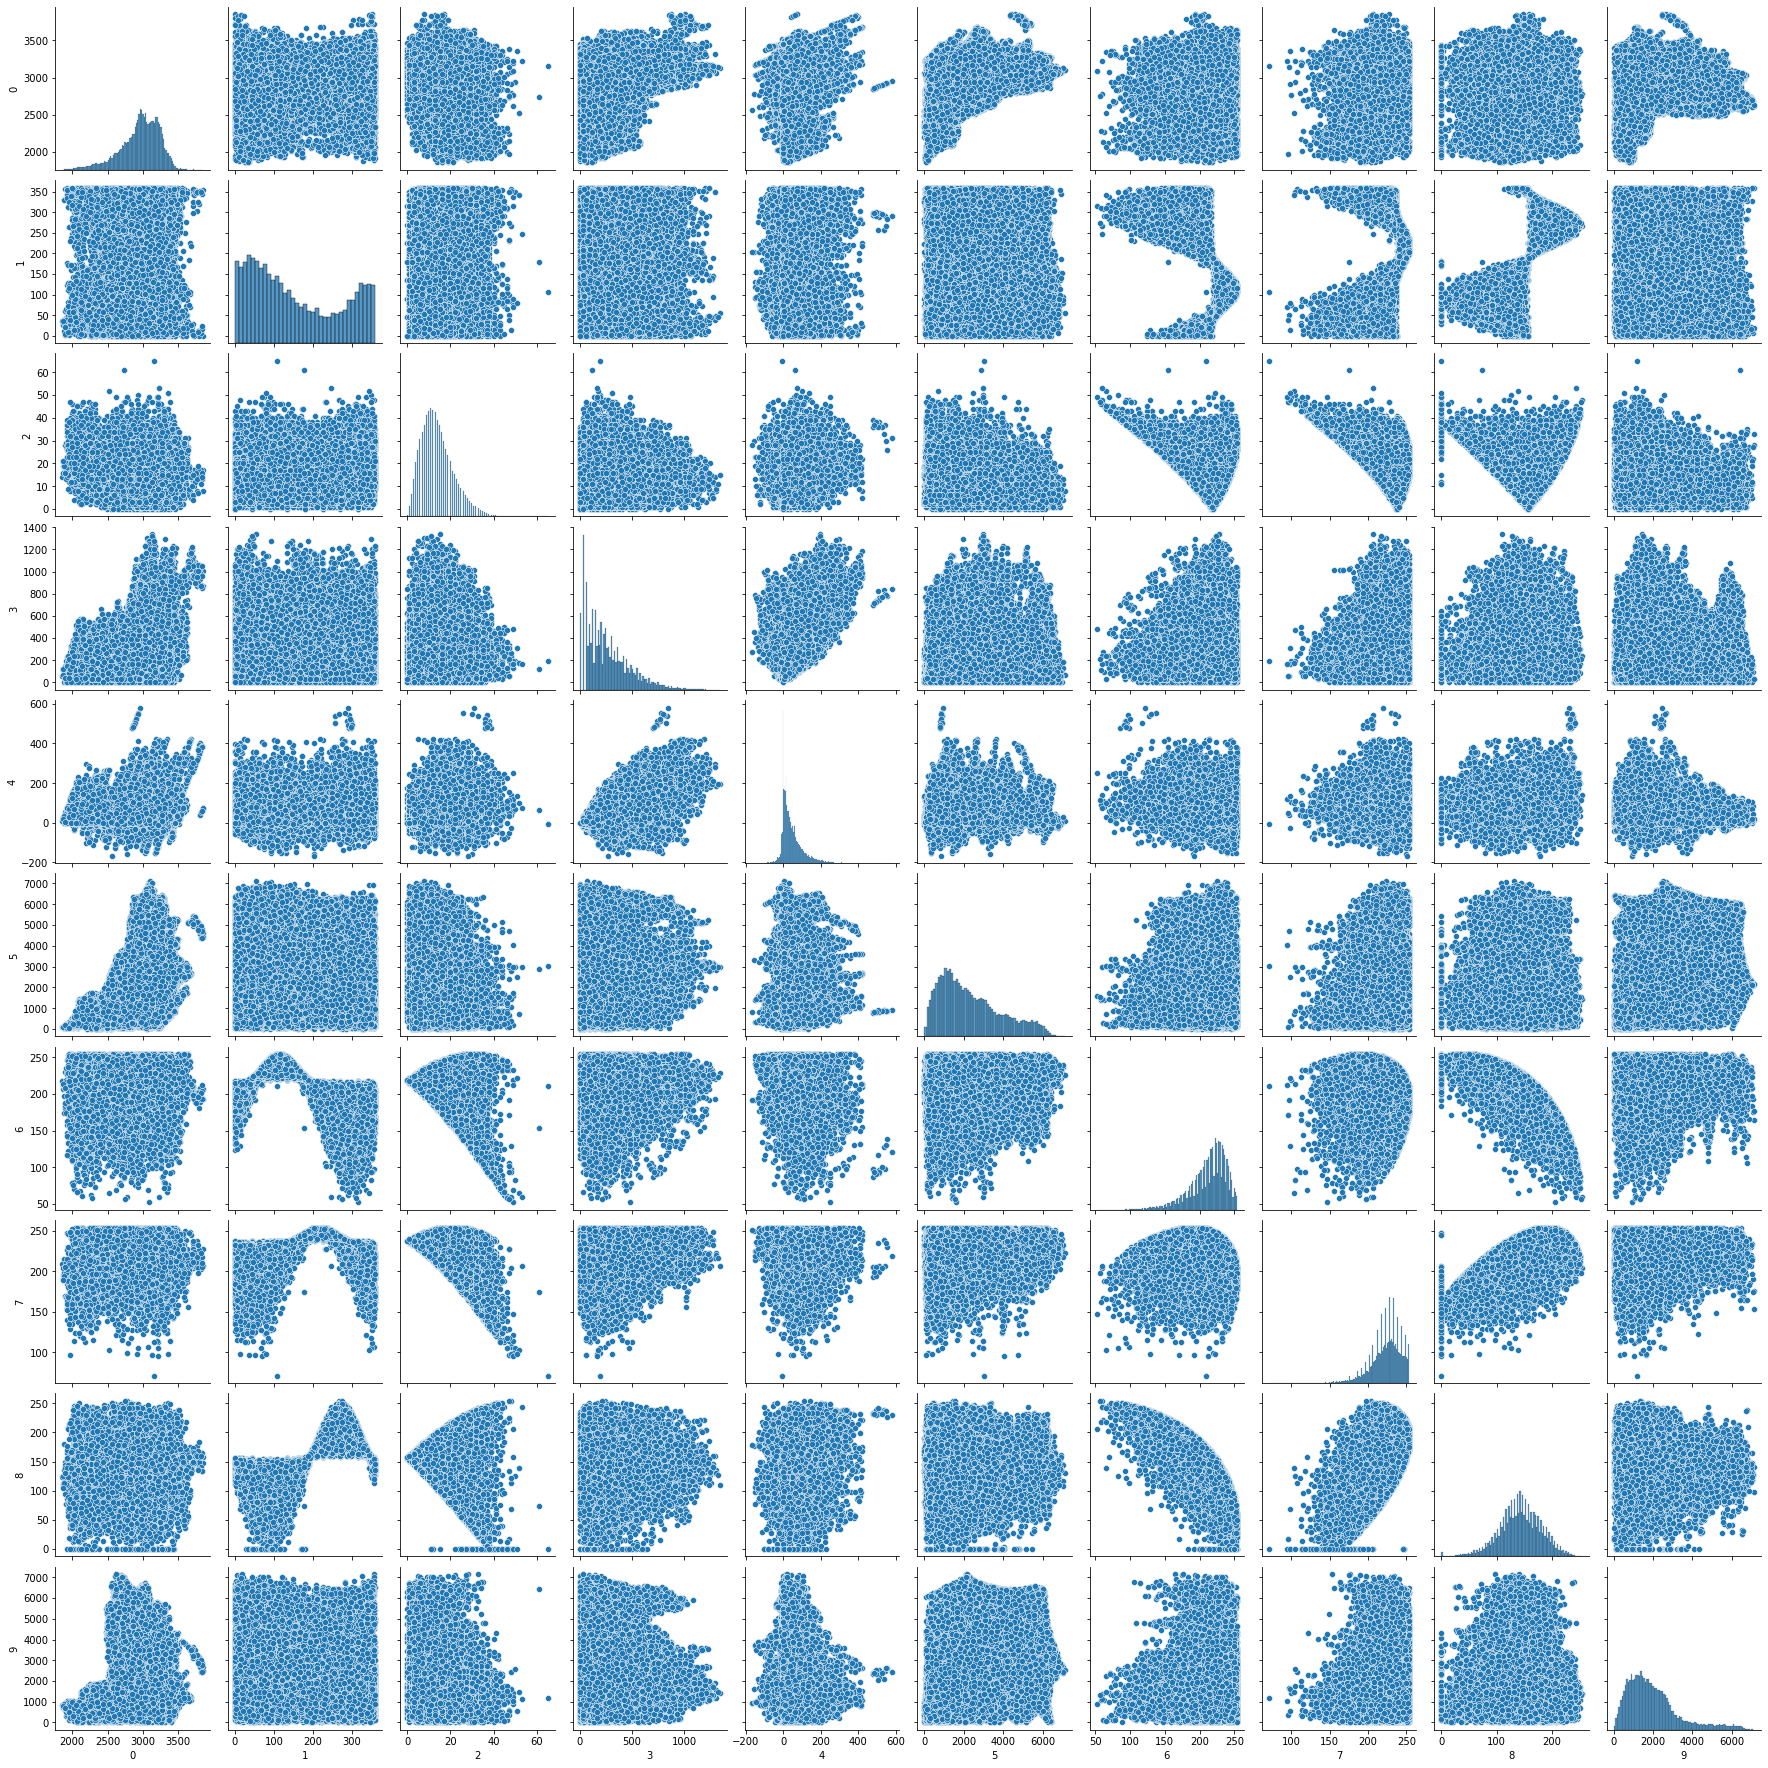

In [12]:
import seaborn as sns
sns.pairplot(df.iloc[:,0:10])

In [13]:
df[54].value_counts()

0.0    54560
1.0     3541
Name: 54, dtype: int64

<AxesSubplot:>

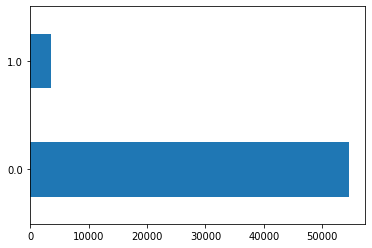

In [14]:
df[54].value_counts().plot(kind = 'barh')

# Training problems

## Train on unbalanced data-set 
imbalanced training data samples create a negative effect on performance.
#### suggestion:
- under sampling
- Oversampling (blind copy)
- Oversampling (SMOTE)
- Ensemble learning on balanced diffrent samples from the data
- Focal loss(weighted loss)


## Training using feature data without standarization/normalization
Differences in the scales across input variables may increase the difficulty of the problem being modeled, as well as variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

# Evaluation problems

## Chossing the evaluation metric
Applying inappropriate evaluation metrics on unbalanced data-set like "Accuarcy". 
#### suggestion:
when you have to evaluate inbalanced data-set you have to choose the right evaluation metrics such as:
- precission.
- recall.
- F1-score.
- ROC and AUC.
- MCC

## Evaluate on the same training data
Since you won't have any data to test the performance of your system if you utilize all of your data for training, you won't be able to tell how well your system is doing. So it will appear as though you have a system but are unaware of its performance. I assume it is not a very pleasant scenario.



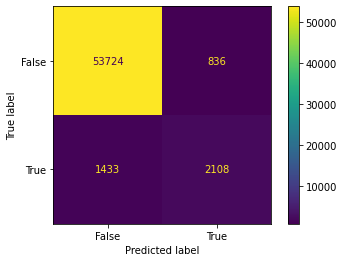

In [15]:
# show confussion matrix on the training data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_true=target,y_pred= training_predictions)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

In [16]:
print(classification_report(y_true=target,y_pred= training_predictions))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98     54560
        True       0.72      0.60      0.65      3541

    accuracy                           0.96     58101
   macro avg       0.85      0.79      0.81     58101
weighted avg       0.96      0.96      0.96     58101



### as we are interested in type 3 so the values which we are interested in is:
            True       0.72      0.60      0.65      3541

### The recall means "how many of this class 3 you find over the whole number of element of this class" 
    recall = 0.60 
### The percission means "How many classified item as number 3 type are correctly classified"
    precission = 0.72
### F1-Score is the harmonic mean between recall and precission
    F1-score = 0.65


## Evaluate after spliting

In [17]:
# only use a random subset for speed - pretend the rest of the data doesn't exist
random_sample = np.random.choice(len(dataset.data), len(dataset.data) // 10)

COVER_TYPE = 3
features = dataset.data[random_sample, :]
target = dataset.target[random_sample] == COVER_TYPE
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=42, stratify=target)

In [18]:
classifier_2 = sklearn.linear_model.LogisticRegression(solver='liblinear') # do not change this

In [19]:
classifier_2.fit(X_train,  y_train)
training_predictions = classifier_2.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(training_predictions, y_test)

In [20]:
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.960


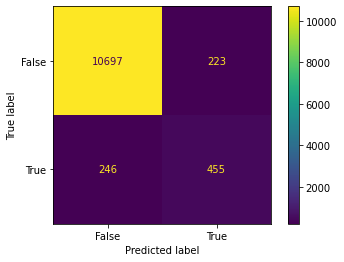

In [21]:
# show confussion matrix on the testing data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_true=y_test,y_pred= training_predictions)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier_2.classes_)
disp.plot()

In [22]:
print(classification_report(y_true=y_test,y_pred= training_predictions))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98     10920
        True       0.67      0.65      0.66       701

    accuracy                           0.96     11621
   macro avg       0.82      0.81      0.82     11621
weighted avg       0.96      0.96      0.96     11621



**Question 2**

Should you get more training data?


I have an idea, what about if we get all the data of cover type 3 and make a new subset from the whole data-set by that we could prevent the problem of unbalanced data and try the experiment with the same model.

In [23]:
### Write your code and explanation here.

In [24]:
COVER_TYPE = 3
features = dataset.data
target = dataset.target == COVER_TYPE
df = pd.DataFrame(np.concatenate((features,np.expand_dims(target, axis=1)),axis=1))

In [25]:
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

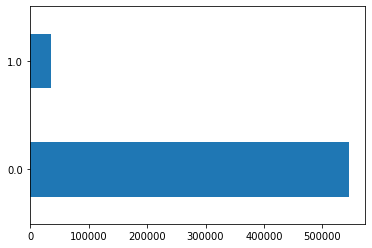

In [26]:
df[54].value_counts().plot(kind = 'barh')

In [27]:
df_only_type_3 = df[df[54]==1]

In [28]:
df_only_type_3[54].value_counts()

1.0    35754
Name: 54, dtype: int64

In [29]:
df_other_types = df[df[54]==0]

In [30]:
df_other_types = df_other_types.sample(n=df_only_type_3.shape[0])

In [31]:
df_other_types[54].value_counts()

0.0    35754
Name: 54, dtype: int64

In [32]:
df_balanced = pd.concat([df_only_type_3, df_other_types])

<AxesSubplot:>

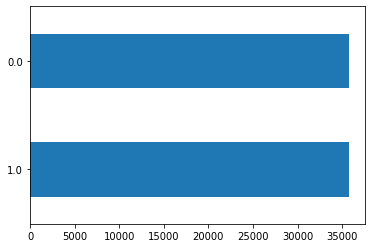

In [33]:
df_balanced[54].value_counts().plot(kind = 'barh')

In [34]:
df_balanced = df_balanced.reset_index()

In [35]:
df_balanced = df_balanced.drop(["index"], axis=1)

In [36]:
classifier = sklearn.linear_model.LogisticRegression(solver='liblinear') # do not change this

In [37]:
features, target = df_balanced.iloc[:,:-1], df_balanced.iloc[:,-1]

In [38]:
classifier.fit(features,  target)
training_predictions = classifier.predict(features)
accuracy = sklearn.metrics.accuracy_score(training_predictions, target)

In [39]:
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.961


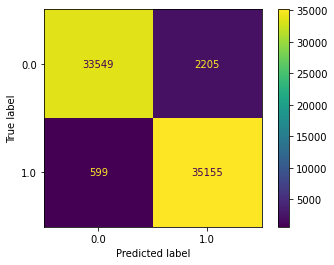

In [40]:
# show confussion matrix on the training data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_true=target,y_pred= training_predictions)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

In [41]:
print(classification_report(y_true=target,y_pred= training_predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96     35754
         1.0       0.94      0.98      0.96     35754

    accuracy                           0.96     71508
   macro avg       0.96      0.96      0.96     71508
weighted avg       0.96      0.96      0.96     71508



In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=42, stratify=target)

In [43]:
classifier_2 = sklearn.linear_model.LogisticRegression(solver='liblinear') # do not change this

In [44]:
classifier_2.fit(X_train,  y_train)
training_predictions = classifier_2.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(training_predictions, y_test)

In [45]:
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.960


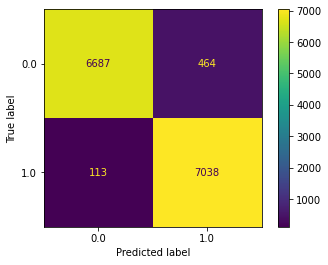

In [46]:
# show confussion matrix on the testing data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_true=y_test,y_pred= training_predictions)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier_2.classes_)
disp.plot()

In [47]:
print(classification_report(y_true=y_test,y_pred= training_predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      7151
         1.0       0.94      0.98      0.96      7151

    accuracy                           0.96     14302
   macro avg       0.96      0.96      0.96     14302
weighted avg       0.96      0.96      0.96     14302



**Question 3**

How would you decide which features to include in the deployed model?

In [48]:
### Write your code and explanation here.

# 1. Remove the low variance features

In [49]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.03)
var_thres.fit(df_balanced)



VarianceThreshold(threshold=0.03)

In [50]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
        True])

In [51]:
df_balanced.columns[var_thres.get_support()]

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16, 17, 19, 23,
       36, 42, 45, 46, 54],
      dtype='object')

In [52]:
low_variance_columns = [column for column in df_balanced.columns
                    if column not in df_balanced.columns[var_thres.get_support()]]

print(len(low_variance_columns))

32


In [55]:
df_without_low_variance = df_balanced.drop(low_variance_columns, axis=1)

In [56]:
classifier = sklearn.linear_model.LogisticRegression(solver='liblinear') # do not change this

In [57]:
features, target = df_without_low_variance.iloc[:,:-1], df_without_low_variance.iloc[:,-1]
classifier.fit(features,  target)
training_predictions = classifier.predict(features)
accuracy = sklearn.metrics.accuracy_score(training_predictions, target)

In [58]:
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.957


# 2. remove the correlated feature

In [81]:
features, target = df_without_low_variance.iloc[:,:-1], df_without_low_variance.iloc[:,-1]
features.corr()

,0,1,2,3,4,5,6,7,8,9,...,13,15,16,17,19,23,36,42,45,46
0,1.000000,-0.092771,-0.469567,0.312036,-0.073202,0.606015,0.250255,0.314671,0.035383,0.470467,...,-0.759292,-0.138916,-0.168970,-0.141625,-0.221551,-0.457466,0.236373,0.280222,0.250310,0.182263
1,-0.092771,1.000000,0.130775,-0.000684,0.108259,-0.041001,-0.605738,0.262173,0.665263,-0.123119,...,0.157311,-0.042379,-0.033764,-0.014738,-0.005023,0.205601,-0.013180,-0.073789,0.021674,-0.003639
2,-0.469567,0.130775,1.000000,-0.121338,0.253793,-0.314744,-0.424936,-0.554960,-0.109622,-0.320033,...,0.414486,-0.150057,0.144777,0.145300,-0.047448,0.409502,-0.206590,-0.168579,-0.168276,0.053717
3,0.312036,-0.000684,-0.121338,1.000000,0.549866,0.138057,0.027779,0.076874,0.042486,0.127068,...,-0.153529,0.033283,-0.072895,-0.098600,-0.000618,-0.104785,-0.070980,0.059235,0.139598,0.107809
4,-0.073202,0.108259,0.253793,0.549866,1.000000,-0.088798,-0.195908,-0.143235,0.053872,-0.122684,...,0.190972,-0.005166,0.006419,-0.022804,0.087551,0.151105,-0.156214,-0.090678,-0.000352,0.090029
5,0.606015,-0.041001,-0.314744,0.138057,-0.088798,1.000000,0.123783,0.225675,0.068016,0.484033,...,-0.480695,-0.120727,-0.102659,-0.098394,-0.160187,-0.277785,0.102025,0.389503,0.035336,0.037505
6,0.250255,-0.605738,-0.424936,0.027779,-0.195908,0.123783,1.000000,0.116639,-0.761881,0.183213,...,-0.349249,0.130867,0.110549,0.139851,0.025411,-0.506780,0.052918,0.094549,0.037178,-0.010101
7,0.314671,0.262173,-0.554960,0.076874,-0.143235,0.225675,0.116639,1.000000,0.531254,0.161641,...,-0.373916,0.140172,0.004602,0.174654,-0.005803,-0.418404,0.099505,0.042761,0.109898,-0.020331
8,0.035383,0.665263,-0.109622,0.042486,0.053872,0.068016,-0.761881,0.531254,1.000000,-0.017269,...,0.038331,-0.016818,-0.131629,-0.066661,-0.014601,0.162729,0.041037,-0.028218,0.057037,-0.007379
9,0.470467,-0.123119,-0.320033,0.127068,-0.122684,0.484033,0.183213,0.161641,-0.017269,1.000000,...,-0.426036,-0.118279,-0.100562,-0.091667,-0.128061,-0.262292,0.087673,0.307570,0.026656,0.039209


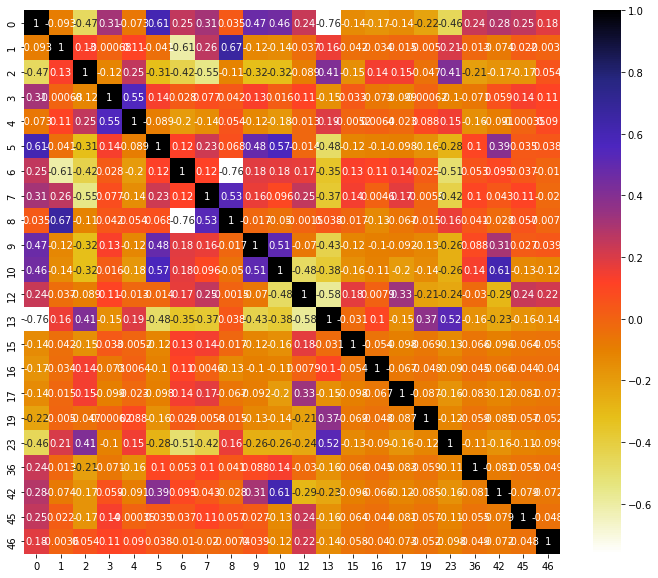

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = features.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()



In [83]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [84]:
corr_features = correlation(features, 0.65)
len(set(corr_features))

2

In [85]:
corr_features

{8, 13}

In [86]:
features_without_colleration = features.drop(corr_features, axis=1)

In [87]:
classifier = sklearn.linear_model.LogisticRegression(solver='liblinear') # do not change this

In [88]:
classifier.fit(features_without_colleration,  target)
training_predictions = classifier.predict(features_without_colleration)
accuracy = sklearn.metrics.accuracy_score(training_predictions, target)

In [89]:
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.952


# 3. using Feature important

In [90]:
classifier.intercept_[0]

2.282060236266361

In [91]:
w=classifier.coef_[0]

In [92]:
feature_name = features_without_colleration.columns 

In [93]:
feature_name

Index([0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 15, 16, 17, 19, 23, 36, 42, 45, 46], dtype='object')

/home/zaghlol/projects/ds_datascience_challenge/venv/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


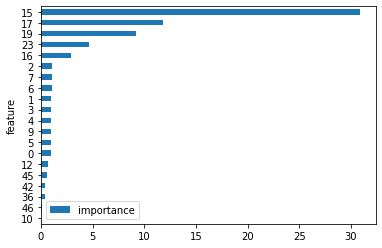

In [94]:
import math
feature_importance = pd.DataFrame(feature_name, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"])
 
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

In [95]:
# we will remove 10,46
features_after_removing_less_important_feature = features_without_colleration.drop([10,46],axis=1)

In [96]:
classifier = sklearn.linear_model.LogisticRegression(solver='liblinear') # do not change this

In [97]:
classifier.fit(features_after_removing_less_important_feature,  target)
training_predictions = classifier.predict(features_after_removing_less_important_feature)
accuracy = sklearn.metrics.accuracy_score(training_predictions, target)

In [98]:
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.948
